In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Meta Information

The iris dataset contains 150 observations<br>
The attributes sepal length, sepal width, petal length, and petal width are numeric<br>
3 Species of the flower are there<br>
Iris-versicolor<br>
Iris-setosa<br>
Iris-virginica<br>

In [2]:
df = pd.read_csv('iris.csv')
df.drop(['Id'], axis = 1, inplace = True)

### Q9: Visualize the class label against the predictor variable using appropriate plot

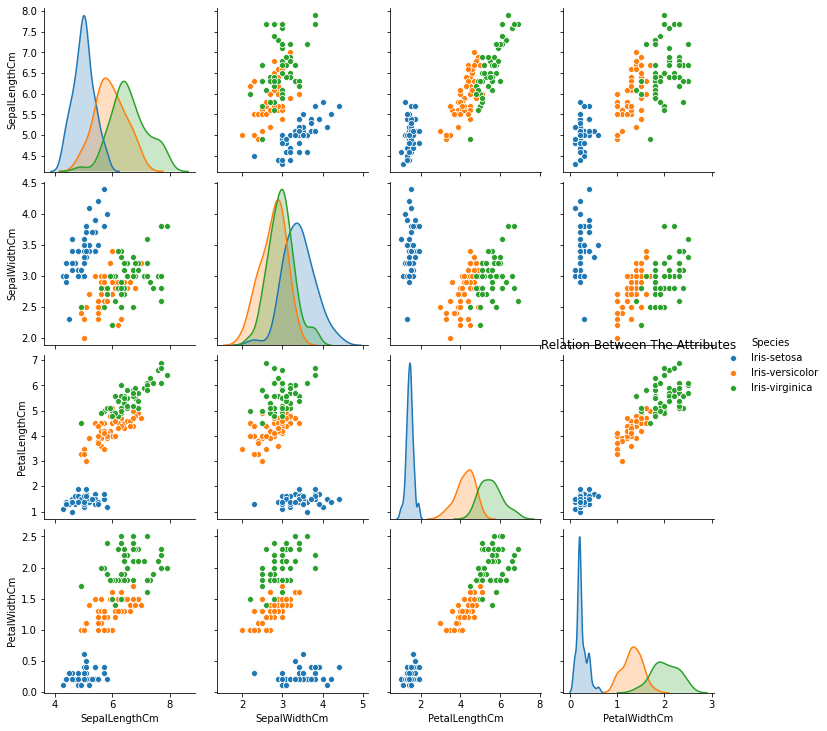

In [3]:
sns.pairplot(df, hue = 'Species')
plt.title("Relation Between The Attributes")
plt.show()

### Q10: Use the IRIS data set to build a logistic regression model (using sklearn) and predict the class label ‘Species’. Divide the dataset into training and test set (70,30) using train_test_split method in sklearn

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

model = LogisticRegression()

X = df [['SepalLengthCm','PetalLengthCm', 'SepalWidthCm', 'PetalWidthCm']]
y = df['Species']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = 'True', random_state = 20)

model.fit(x_train, y_train)
predicted = model.predict(x_test)
predicted

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor'], dtype=object)

In [5]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.86      1.00      0.92        18
 Iris-virginica       1.00      0.79      0.88        14

       accuracy                           0.93        45
      macro avg       0.95      0.93      0.93        45
   weighted avg       0.94      0.93      0.93        45



### Q11 : Analysis and visualize the performance of the classifier using metrics, confusion matrix 

In [6]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, predicted)
predicted_df = pd.DataFrame(predicted)
# predicted_df.value_counts()

<ipython-input-7-e039e54ad2f6>:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


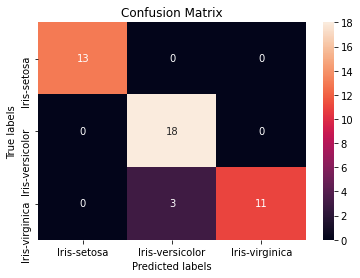

In [7]:
sns.heatmap(confusion, annot = True)
ax = plt.subplot()
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
ax.yaxis.set_ticklabels(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']);

The classifier predicted 3 iris-virginica to be iris-versicolor. The rest were all predicted correctly

### Q12: Use the IRIS data and KNeighborsClassifier (using sklearn) and predict the class label ‘Species’ for k value between 2 and 20. Divide the dataset into training and test set (70,30) using train_test_split method in sklearn.

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
accuracy = []
for i in range(2, 21):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    pred = knn.predict(x_test)
    accuracy.append(accuracy_score(y_test, pred))
accuracy
    

[0.8888888888888888,
 0.9333333333333333,
 0.9333333333333333,
 0.9555555555555556,
 0.9555555555555556,
 0.9777777777777777,
 0.9555555555555556,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9555555555555556,
 0.9333333333333333]

### Q13: Identify the best k ( for k between 2 and 20) for the model built.

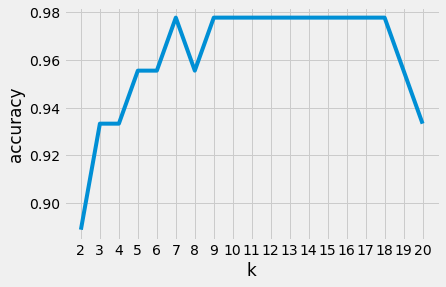

In [9]:
plt.style.use('fivethirtyeight')
plt.plot(np.arange(2,21,1), accuracy)
plt.xticks(np.arange(2,21,1))
plt.xlabel('k')
plt.ylabel('accuracy')
plt.show()

k = 7

In [10]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)

### Q14: Comment on the classifier (Logistic Regression or KNeighborsClassifier ) that has a better performance for the IRIS dataset

In [11]:
print("Logistic Regression")
print(classification_report(y_test, predicted))

print("KNN")
print(classification_report(y_test, pred))

Logistic Regression
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.86      1.00      0.92        18
 Iris-virginica       1.00      0.79      0.88        14

       accuracy                           0.93        45
      macro avg       0.95      0.93      0.93        45
   weighted avg       0.94      0.93      0.93        45

KNN
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.95      1.00      0.97        18
 Iris-virginica       1.00      0.93      0.96        14

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



Logistic Regressing has an accuray of 0.93 <br>
Whereas KNN has an accuracy of 0.98 hence,<br>
KNN has a higher accuracy for this dataset and the best value for k ranges between 9 and 18. 